<a href="https://colab.research.google.com/github/Melvianamell/MSIB-K2-KelasAwanPintar/blob/main/ML_3_Classification_using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-3 Classification using Decision Tree

Pada praktik kali ini, kita akan coba mengembangkan model Decision Tree yang dapat memprediski apakah seseorang beresiko menderita diabetes atau tidak.

# Import Library

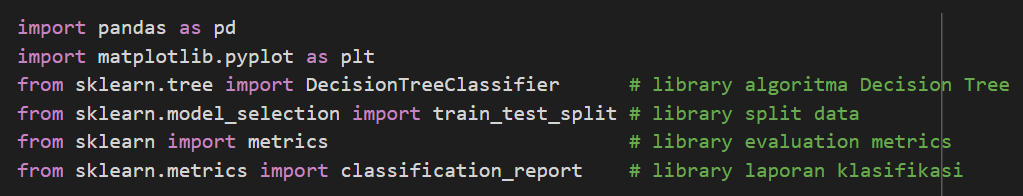

In [1]:
# Tulis di sini
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report


# Load dataset


Download dataset [di sini](https://drive.google.com/file/d/1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK/view?usp=sharing)

Setelah dataset berhasil di-download, upload dataset ke Colab supaya bisa digunakan.

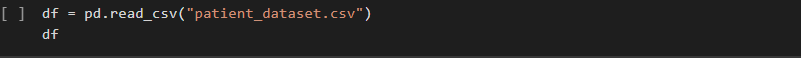

In [3]:
# Tulis di sini
! wget -O 50_Startups.csv https://drive.usercontent.google.com/u/0/uc?id=1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK&export=download

df =pd.read_csv('patient_dataset.csv')

--2024-11-14 12:37:38--  https://drive.usercontent.google.com/u/0/uc?id=1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.usercontent.google.com/uc?id=1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK [following]
--2024-11-14 12:37:38--  https://drive.usercontent.google.com/uc?id=1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK [following]
--2024-11-14 12:37:38--  https://drive.usercontent.google.com/download?id=1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, await

Periksa kelengkapan dataset dengan melihat metadatanya menggunakan method `info()`.

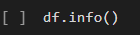

In [4]:
# Tulis di sini
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terdapat 8 feature:
- Pregnancies
- Glucose
- BooldPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

dan satu label, yakni Outcome:

- Label 0 = tidak berpotensi menderita diabetes
- Label 1 = berpotensi menderita diabetes

# Data Exploration

**Pisahkan X dan Y dari dataset**

Salah satu kelebihan algoritma Decision Tree adalah kita tidak perlu menormalisasi feature.

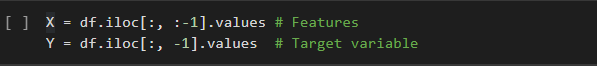

In [5]:
# Tulis di sini
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

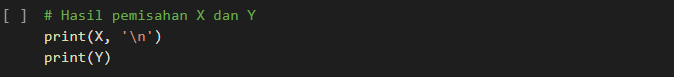

In [6]:
# Tulis di sini
print(x,'\n')
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


**Splitting Data**

Split data menjadi:
- training set (X_train, y_train)
- test set (X_test, y_test)

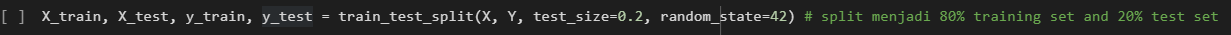

In [7]:
# Tulis di sini
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


---

# Modeling

Algoritma Decision Tree memiliki banyak hyperparameter yang bisa kita setel (tuning hyperparameter). Empat diantaranya adalah:

Hpyerparameter | Keterangan
---|---
criterion | Fungsi untuk mengukur kualitas sebuah split
max_depth | Kedalaman maksimum tree
max_leaf_nodes | Jumlah leaf node maksimum
random_state | Mengontrol ke-random-an algoritma

Hasil tuning hyperparameter yang tepat dapat meningkatkan performa model.

**Note:**

Jika kita tidak tahu secara pasti kegunaan hyperparameter, kita bisa menggunakan setelan default dengan cara mengosongkan hyperparameter.

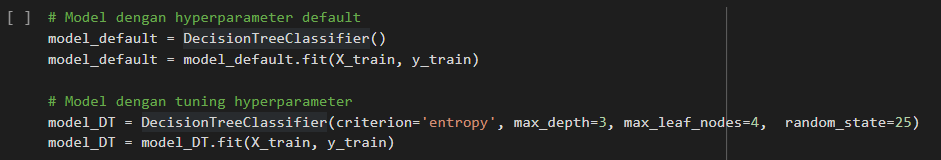

In [8]:
# Tulis di sini
# Model dengan hyperparameter default
model_default = DecisionTreeClassifier()  # Perbaiki sintaks
model_default = model_default.fit(x_train, y_train)  # Melatih model dengan data latih

# Model dengan tuning hyperparameter
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)  # Perbaiki sintaks
model_DT.fit(x_train, y_train)  # Melatih model dengan data latih


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4,
                       random_state=25)

---

# Evaluation

**Mengevaluasi Performa Model dengan Hyperparameter Default**

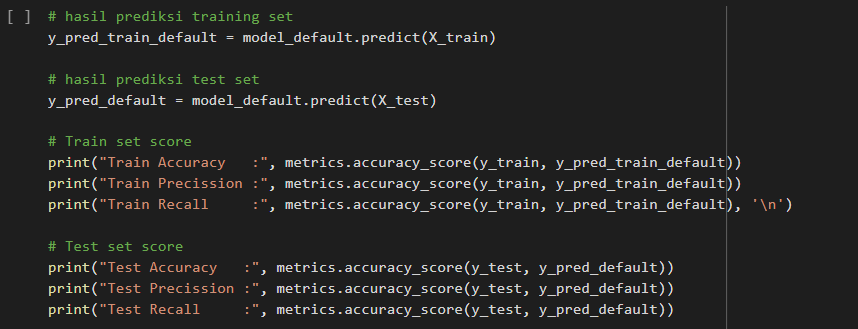

In [9]:
# Tulis di sini
# Prediksi pada data latih
y_pred_train_default = model_default.predict(x_train)

# Prediksi pada data uji
y_pred_default = model_default.predict(x_test)

# Menghitung dan mencetak metrik untuk data latih
print("Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Precision:", metrics.precision_score(y_train, y_pred_train_default))
print("Train Recall:", metrics.recall_score(y_train, y_pred_train_default))

# Menghitung dan mencetak metrik untuk data uji
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred_default))
print("Test Precision:", metrics.precision_score(y_test, y_pred_default))
print("Test Recall:", metrics.recall_score(y_test, y_pred_default))


Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Test Accuracy: 0.7337662337662337
Test Precision: 0.6166666666666667
Test Recall: 0.6727272727272727


**Mengevaluasi Performa Model dengan Tuning Hyperparameter**

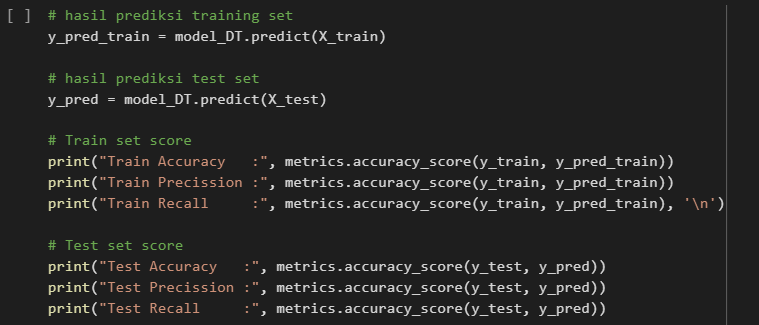

In [10]:
# Tulis di sini
# Prediksi pada data latih
y_pred_train_default = model_DT.predict(x_train)

# Prediksi pada data uji
y_pred= model_DT.predict(x_test)

# Menghitung dan mencetak metrik untuk data latih
print("Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Precision:", metrics.precision_score(y_train, y_pred_train_default))
print("Train Recall:", metrics.recall_score(y_train, y_pred_train_default))

# Menghitung dan mencetak metrik untuk data uji
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred_default))
print("Test Precision:", metrics.precision_score(y_test, y_pred_default))
print("Test Recall:", metrics.recall_score(y_test, y_pred_default))


Train Accuracy: 0.7719869706840391
Train Precision: 0.7239263803680982
Train Recall: 0.5539906103286385
Test Accuracy: 0.7337662337662337
Test Precision: 0.6166666666666667
Test Recall: 0.6727272727272727


Berdasarkan hasil evaluasi performa:

- model dengan hyperparameter default mengalami overfitting
- model dengan tuning hyperparameter sudah **good fit**, meskipun memiliki train set score yang lebih rendah



---

**Generate Classification Report**

Kita juga dapat menampilkan hasil evaluasi model menggunakan `classification report`.

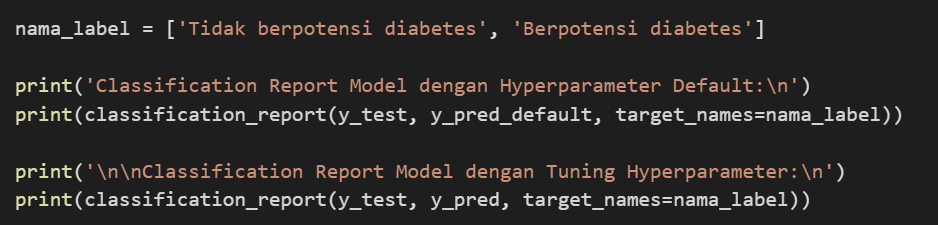

In [11]:
# Tulis di sini
nama_label = ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

# Laporan klasifikasi untuk model dengan hyperparameter default
print('Classification Report Model dengan Hyperparameter Default:\n')
print(classification_report(y_test, y_pred_default, target_names=nama_label))

# Laporan klasifikasi untuk model dengan tuning hyperparameter
print('\n\nClassification Report Model dengan Tuning Hyperparameter:\n')
print(classification_report(y_test, y_pred, target_names=nama_label))


Classification Report Model dengan Hyperparameter Default:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.81      0.77      0.79        99
      Berpotensi diabetes       0.62      0.67      0.64        55

                 accuracy                           0.73       154
                macro avg       0.71      0.72      0.72       154
             weighted avg       0.74      0.73      0.74       154



Classification Report Model dengan Tuning Hyperparameter:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.79      0.88      0.83        99
      Berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



Classification report menampilkan informasi yang lebih detail dan banyak dibanding evaluation metrics.

# Men-Generate Tree

**Tree Model dengan Hyperparameter Default**

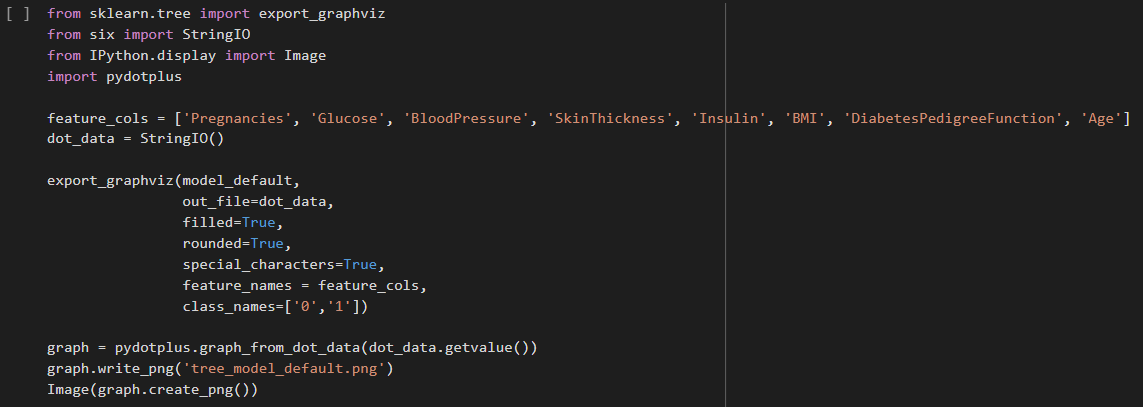

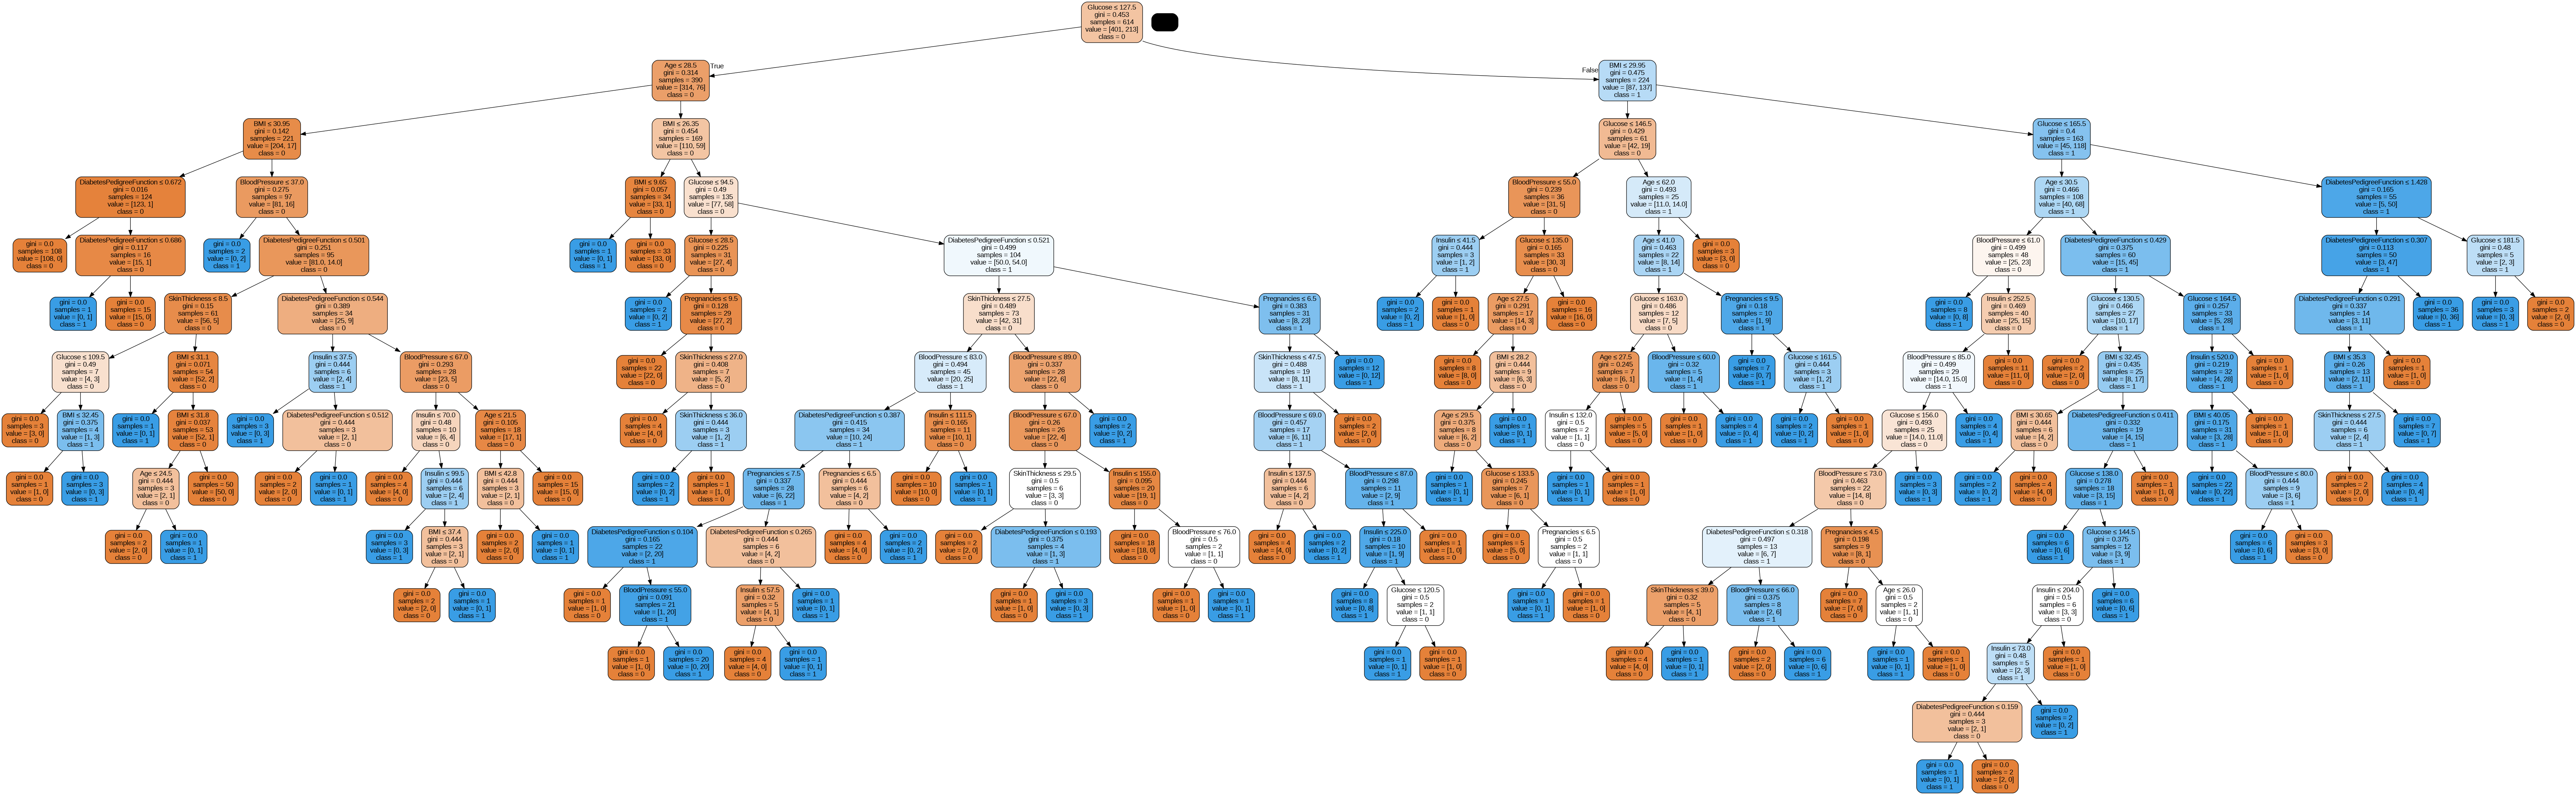

In [12]:
# Tulis di sini
from sklearn.tree import export_graphviz
from six import StringIO  # Perbaikan import
from IPython.display import Image
import pydotplus  # Perbaikan import

# Mendefinisikan nama fitur
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Menyiapkan StringIO untuk menyimpan representasi dot dari pohon keputusan
dot_data = StringIO()

# Mengekspor pohon keputusan ke dalam format DOT
export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

# Membuat grafik dari data DOT
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Menyimpan grafik ke dalam file PNG
graph.write_png('tree_model_default.png')

# Menampilkan gambar
Image(graph.create_png())


**Tree Model dengan Tuning Hyperparameter**

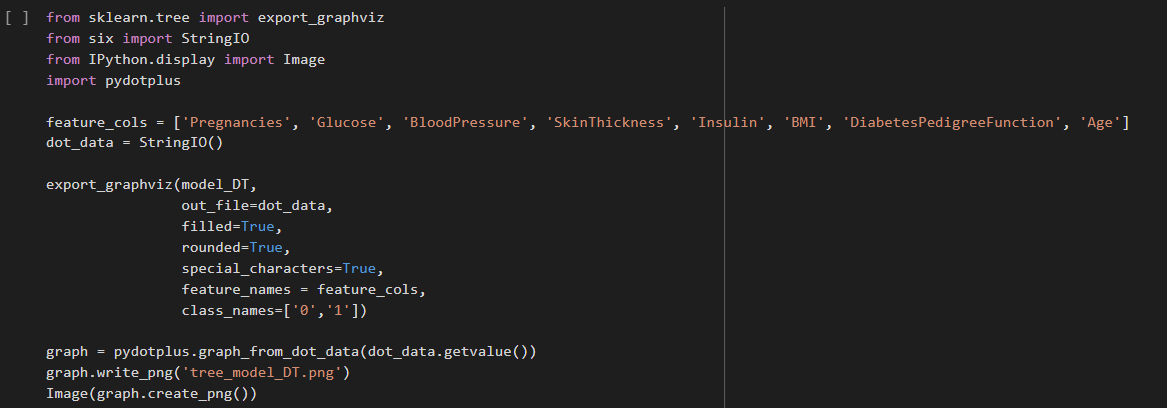

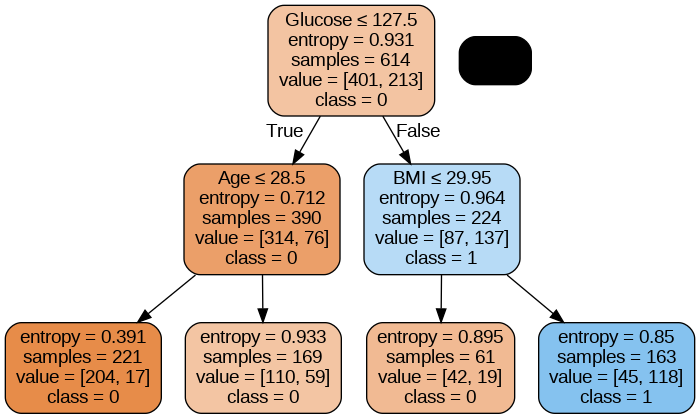

In [13]:
# Tulis di sini
# Mendefinisikan nama-nama fitur yang digunakan dalam model Decision Tree
# Fitur ini adalah kolom-kolom yang digunakan dalam dataset untuk memprediksi hasil diabetes
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']

# Menyiapkan StringIO untuk menyimpan representasi DOT dari pohon keputusan
# DOT adalah format yang digunakan oleh Graphviz untuk menggambarkan graf
dot_data = StringIO()

# Mengekspor model pohon keputusan (model_DT) ke dalam format DOT dan menyimpannya di objek dot_data
# filled=True: Mengisi warna kotak simpul sesuai kelas mayoritas
# rounded=True: Membuat bentuk simpul lebih bulat
# special_characters=True: Mengizinkan karakter khusus seperti '<=' dalam kondisi simpul
# feature_names=feature_cols: Memberikan label fitur pada pohon
# class_names=['0', '1']: Memberikan nama kelas ('0' untuk negatif, '1' untuk positif diabetes)
export_graphviz(model_DT,               # Model pohon keputusan yang telah dilatih
                out_file=dot_data,      # Output akan disimpan dalam objek dot_data
                filled=True,            # Mengisi simpul dengan warna yang menunjukkan proporsi kelas
                rounded=True,           # Membuat simpul dengan sudut membulat untuk visualisasi yang lebih bagus
                special_characters=True,  # Mengizinkan penggunaan karakter spesial dalam label simpul
                feature_names=feature_cols,  # Memberikan nama fitur pada masing-masing simpul
                class_names=['0', '1'])  # Memberikan nama pada kelas target ('0' dan '1')

# Mengonversi data DOT yang telah diekspor dari model menjadi objek graf
# Menggunakan pustaka pydotplus untuk mengubah string DOT menjadi graf visual
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Menyimpan graf yang dihasilkan ke dalam file gambar PNG
# File ini bisa dibuka untuk melihat visualisasi pohon keputusan yang telah dibuat
graph.write_png('tree_model_default.png')

# Menampilkan gambar hasil graf yang dibuat langsung di notebook
# 'create_png()' menghasilkan gambar PNG dari graf dan menampilkannya di notebook
Image(graph.create_png())


Manakah tree yang lebih baik menurut kamu? Kemukakan pendapatmu beserta alasannya!

> **FYI**: Image tree bisa kita download via side menu Colab.

---

**Perhitungan Skor Feature**

Kita juga dapat memeriksa feature apa yang paling penting berdasarkan score feature.

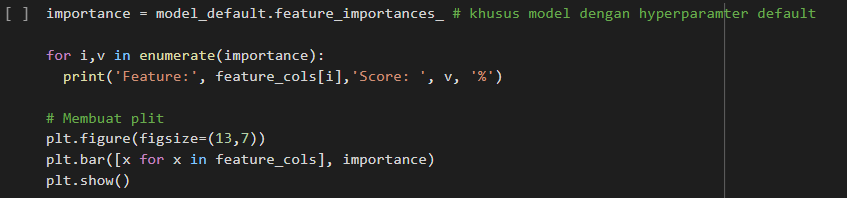

Feature: Pregnancies Score: 0.04137563775335076
Feature: Glucose Score: 0.31846943911512665
Feature: BloodPressure Score: 0.14782623187938482
Feature: SkinThickness Score: 0.05766194657272512
Feature: Insulin Score: 0.08062999371071018
Feature: BMI Score: 0.15387164767752662
Feature: DiabetesPedigreeFunction Score: 0.09730014726593043
Feature: Age Score: 0.10286495602524537


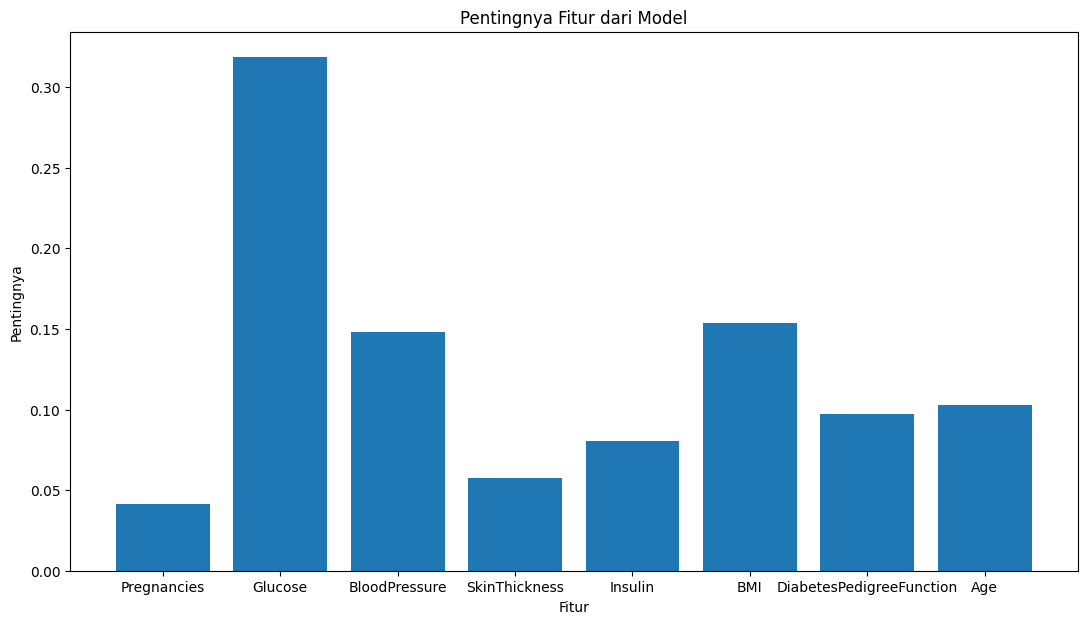

In [14]:

# Tulis di sini

# Menghitung pentingnya fitur dari model pohon keputusan
importance = model_default.feature_importances_
# Di sini, 'model_default' adalah model pohon keputusan yang telah dilatih.
# 'feature_importances_' memberikan nilai pentingnya untuk setiap fitur yang digunakan dalam model.

# Mencetak pentingnya setiap fitur
for i, v in enumerate(importance):
    # 'enumerate' digunakan untuk mendapatkan indeks 'i' dan nilai 'v' dari 'importance'.
    # 'importance' adalah array yang berisi nilai pentingnya setiap fitur.

    print('Feature:', feature_cols[i], 'Score:', v)
    # Mencetak nama fitur dan skor pentingnya.
    # 'feature_cols[i]' memberikan nama fitur berdasarkan indeks 'i'.
    # 'v' adalah nilai pentingnya untuk fitur tersebut.

# Membuat plot untuk visualisasi pentingnya fitur
plt.figure(figsize=(13, 7))
# 'plt.figure' membuat objek figure baru dengan ukuran 13x7 inci.

# Membuat grafik batang untuk menunjukkan pentingnya setiap fitur
plt.bar([x for x in feature_cols], importance)
# 'plt.bar' digunakan untuk membuat grafik batang.
# [x for x in feature_cols] menciptakan daftar fitur untuk sumbu X.
# 'importance' adalah nilai untuk sumbu Y, menunjukkan pentingnya masing-masing fitur.

# Menambahkan label dan judul pada grafik
plt.xlabel('Fitur')  # Menambahkan label untuk sumbu X, yaitu "Fitur".
plt.ylabel('Pentingnya')  # Menambahkan label untuk sumbu Y, yaitu "Pentingnya".
plt.title('Pentingnya Fitur dari Model')  # Menambahkan judul pada grafik.

plt.show()  # Menampilkan grafik yang telah dibuat.
# 'plt.show()' akan memunculkan jendela baru yang menampilkan grafik batang pentingnya fitur.





---



# Kesimpulan

Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model.



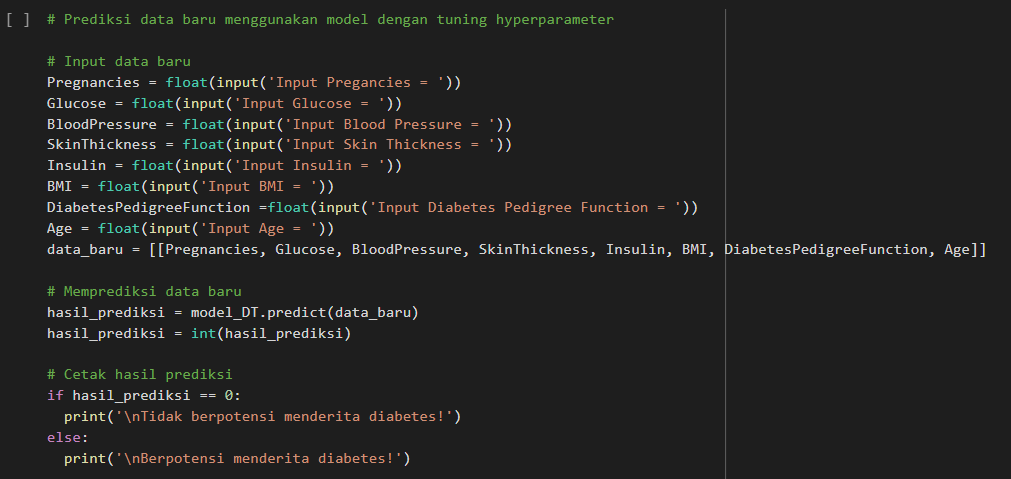

In [15]:

# Tulis di sini
# Mengambil input dari pengguna
Pregnancies = float(input('Input Pregnancies: '))  # Input jumlah kehamilan
Glucose = float(input('Input Glucose: '))  # Input kadar glukosa
BloodPressure = float(input('Input Blood Pressure: '))  # Input tekanan darah
SkinThickness = float(input('Input Skin Thickness: '))  # Input ketebalan kulit
Insulin = float(input('Input Insulin: '))  # Input kadar insulin
BMI = float(input('Input BMI: '))  # Input Indeks Massa Tubuh (BMI)
DiabetesPedigreeFunction = float(input('Input Diabetes Pedigree Function: '))  # Input fungsi pedigree diabetes
Age = float(input('Input Age: '))  # Input umur

# Mengorganisir data baru dalam format yang sesuai untuk prediksi
data_baru = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

# Memprediksi data baru menggunakan model yang telah dilatih
hasil_prediksi = model_DT.predict(data_baru)

# Mengubah hasil prediksi menjadi integer
hasil_prediksi = int(hasil_prediksi)

# Cetak hasil prediksi
if hasil_prediksi == 0:  # Memperbaiki dari '--' menjadi '=='
    print('\nTidak berpotensi menderita diabetes!')
else:
    print('\nBerpotensi menderita diabetes!')



Input Pregnancies: 90
Input Glucose: 80
Input Blood Pressure: 85
Input Skin Thickness: 88
Input Insulin: 91
Input BMI: 80
Input Diabetes Pedigree Function: 70
Input Age: 75

Tidak berpotensi menderita diabetes!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-15-f13eea2dd919>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hasil_prediksi = int(hasil_prediksi)


# Exercise (Latihan)

Lakukan pemodelan ulang menggunakan dataset yang sama!
1. Gunakan algoritma Decision Tree
2. Pilih 4 dari 8 feature yang tersedia
3. Lakukan tuning hyperparameter hingga mendapat model dengan performa terbaik
4. Generate tree model
5. Buat kesimpulan dari activity yang sudah dilakukan

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


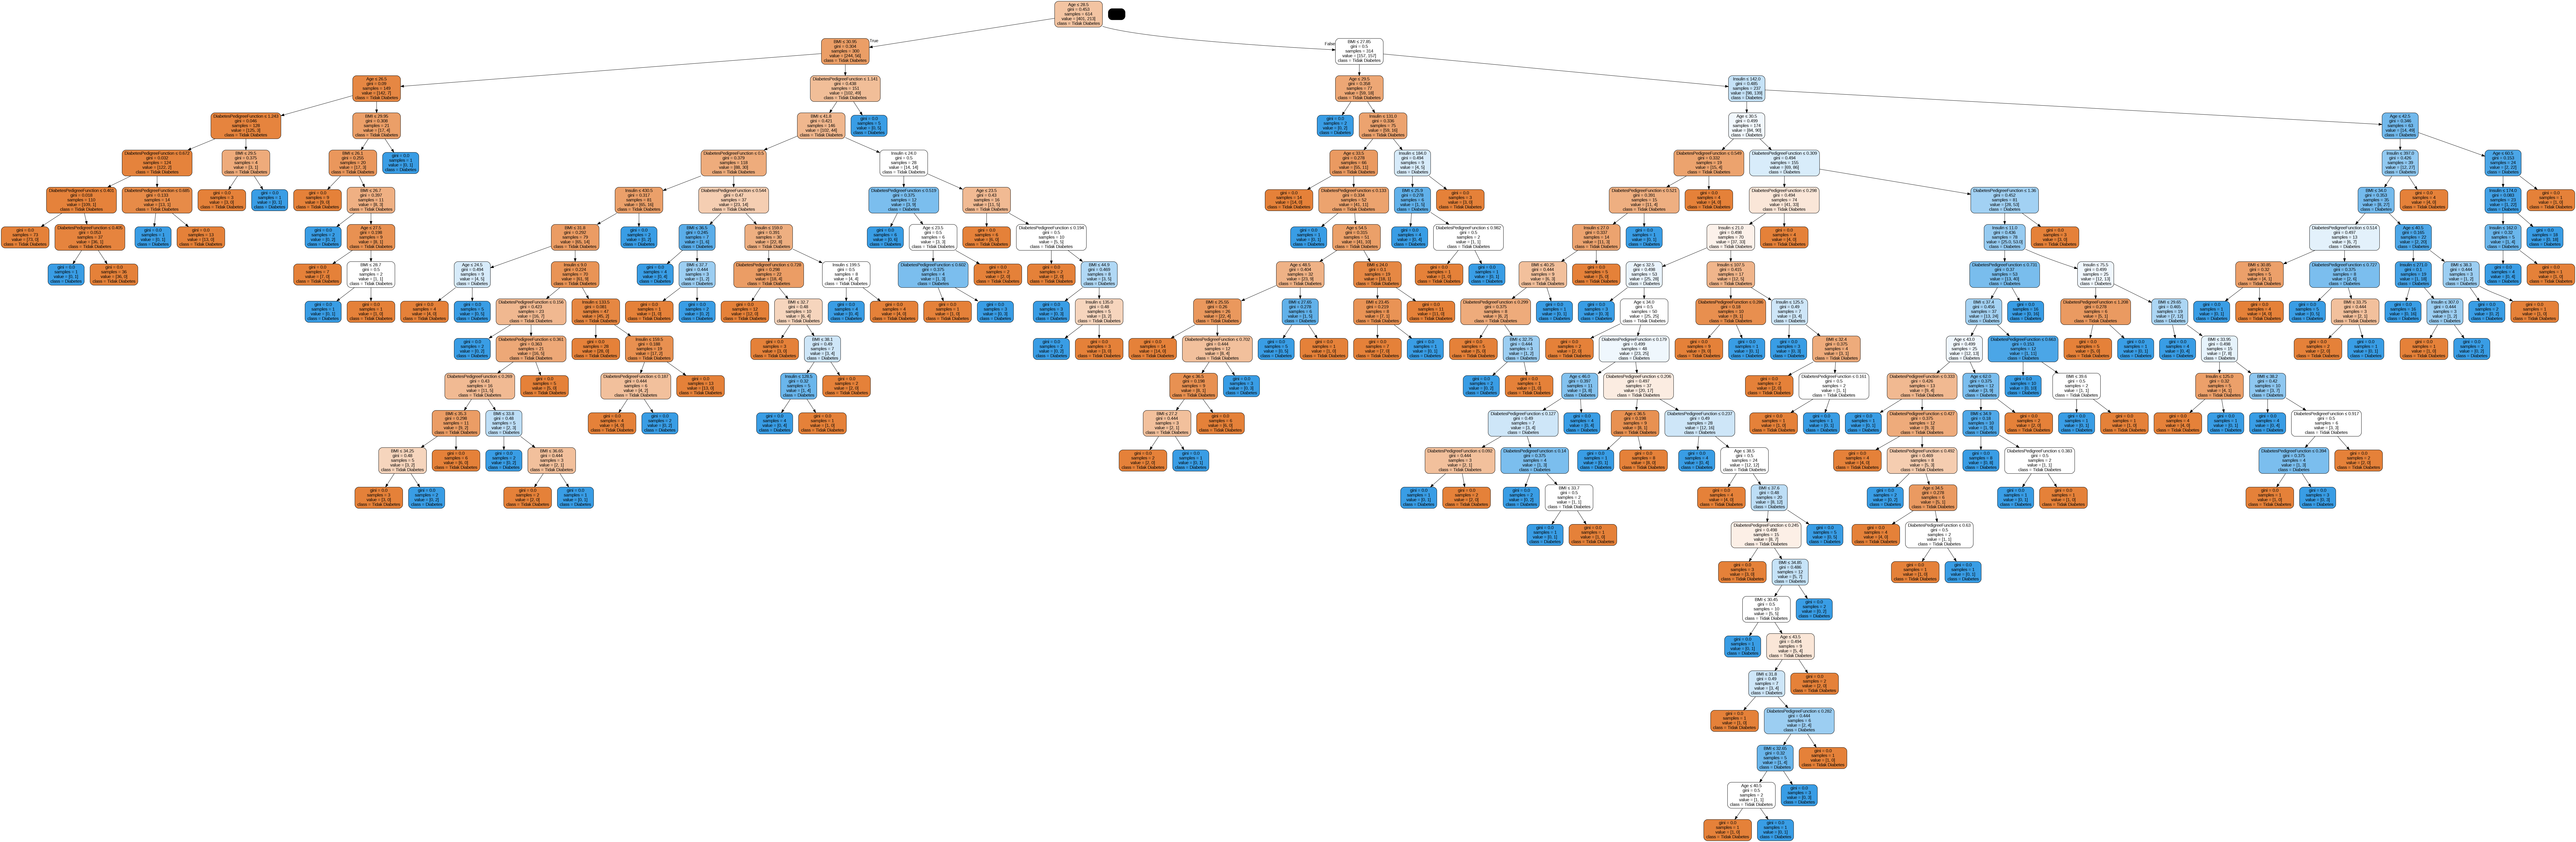

In [16]:
print(df.columns)

# Pastikan menggunakan nama kolom yang benar dari DataFrame
feature_cols = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']  # Sesuaikan dengan nama kolom sebenarnya
x = df[feature_cols]  # Pilih feature
y = df['Outcome']  # Target label

# Membagi data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model dengan hyperparameter default
model_default = DecisionTreeClassifier(random_state=42)
model_default = model_default.fit(x_train, y_train)

# Visualisasi pohon keputusan
dot_data = StringIO()
export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['Tidak Diabetes', 'Diabetes'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
